{'Indre By': 51937, 'Østerbro': 75113, 'Nørrebro': 78802, 'Vesterbro/Kgs. Enghave': 61623, 'Valby': 51727, 'Vanløse': 39537, 'Brønshøj-Husum': 43908, 'Bispebjerg': 53604, 'Amager Øst': 55205, 'Amager Vest': 64967, 'Udenfor': 3872}


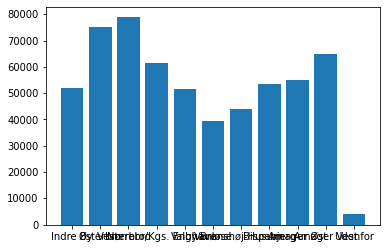

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1) 
array = np.genfromtxt('data.csv', delimiter =',', dtype=np.uint, skip_header=1)


neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

# Find out how many people lived in each of the 11 areas in 2015
population = {}

for key, value in neighb.items():
    mask = (array[:,1] == key) & (array[:,0] == 2015)
    population[value] = np.sum(array[mask][:,4])

    
print(population)

#Make a bar plot to show the size of each city area from the smallest to the largest

plt.bar(range(len(population)), list(population.values()), align='center')

plt.xticks(range(len(population)), list(population.keys()))

plt.show()





614


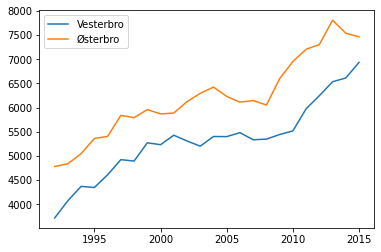

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

mask = (array[:,2] >= 65) & (array[:,0] == 2015)

people = np.sum(array[mask][:,4])


#How many of those were from the other nordic countries (not dk)
#  | (array[:,3] == 5120)
maskFI = (array[:,2] >= 65) & (array[:,0] == 2015) & (array[:,3] == 5104)
maskNO = (array[:,2] >= 65) & (array[:,0] == 2015) & (array[:,3] == 5110)
maskSWE = (array[:,2] >= 65) & (array[:,0] == 2015) & (array[:,3] == 5120)

sumFI = np.sum(array[maskFI][:,4])
sumNO = np.sum(array[maskNO][:,4])
sumSWE = np.sum(array[maskSWE][:,4])

print(sumFI+sumNO+sumSWE)


#Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

oesterbro = {}

vesterbro = {}



for i in range(1992, 2016):
    vesterbroMask = (array[:,2] == 4) & (array[:,0] == i)
    vesterbroPop = np.sum(array[vesterbroMask][:,4])
    vesterbro[i] = vesterbroPop

    oesterbroMask = (array[:,2] == 2) & (array[:,0] == i)
    oesterbroPop = np.sum(array[oesterbroMask][:,4])
    oesterbro[i] = oesterbroPop


plt.plot(vesterbro.keys(),vesterbro.values(),label='Vesterbro')
plt.plot(oesterbro.keys(),oesterbro.values(),label='Østerbro')
plt.legend(loc=2)
plt.show()



